In [1]:
from thermostability.autoencoder import RepresentationAutoEncoder, Decoder, Encoder
import torch
from PIL import Image
from torchvision import transforms
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

image = Image.open("black_dock.png").convert("RGB")
transform = transforms.Compose( [transforms.ToTensor(), transforms.Grayscale()])
input = torch.tensor(transform(image)).to("cuda:0")
print(input.size())
representation_size = 10
per_residue_input_size=640
num_residues=427
encoder = Encoder(per_residue_input_size=per_residue_input_size, per_residue_output_size=2, num_residues=num_residues, representation_size=representation_size).to("cuda:0")

representation = encoder(input)

print("representation size", representation.size())


/tmp/ipykernel_1559316/220013727.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(transform(image)).to("cuda:0")


torch.Size([1, 427, 640])
representation size torch.Size([1, 10])


In [2]:
decoder = Decoder(representation_size=representation_size, per_residue_output_size=8).to("cuda:0")

decoded = decoder(representation)

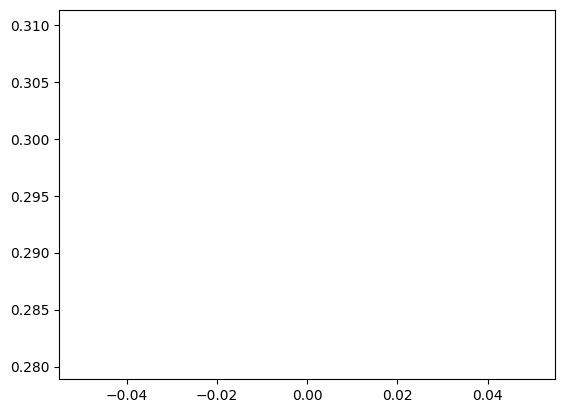

In [3]:
from matplotlib.pyplot import plot 

autoencoder = RepresentationAutoEncoder(per_residue_input_size=per_residue_input_size, per_residue_output_size=2, num_residues=num_residues, representation_size=representation_size).to("cuda:0")
loss_fn = torch.nn.MSELoss()


# from torch import nn

# class WowCoder(nn.Module):
#     def __init__(self):
#         super().__init__()

#         self.worker= nn.Sequential(nn.Flatten(), nn.Linear(per_residue_input_size*num_residues, 10), nn.Linear(10, per_residue_input_size*num_residues))
    
#     def forward(self, x):
#         out = self.worker(x)


#         return out.view(-1, num_residues, per_residue_input_size)
    
# wow_encoder = WowCoder().cuda()

optimizer = torch.optim.SGD(autoencoder.parameters(), lr=0.001, momentum=0.9)

losses = []
for i in range(100):
    optimizer.zero_grad()
    decoded = autoencoder(input)
    loss = loss_fn(decoded, input)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plot(range(len(losses)),losses)

In [4]:
import matplotlib.pyplot as plt

def plotImg(a: torch.Tensor):
   
    plt.imshow(a.numpy(force=True))
    plt.colorbar()
    plt.show()

def plotDiff(a: torch.Tensor, b: torch.Tensor):
    plotImg(torch.subtract(a,b).abs())

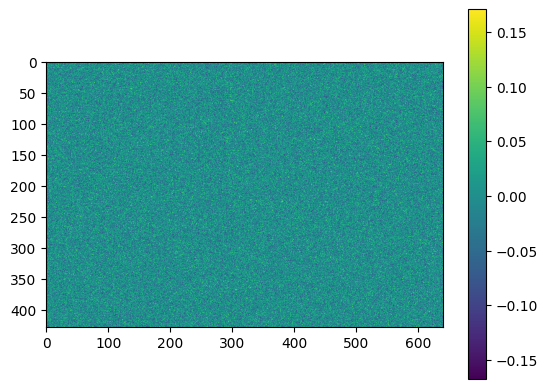

In [5]:
plotImg(autoencoder(input)[0])

In [6]:
plotDiff(input[0],input[1])

IndexError: index 1 is out of bounds for dimension 0 with size 1

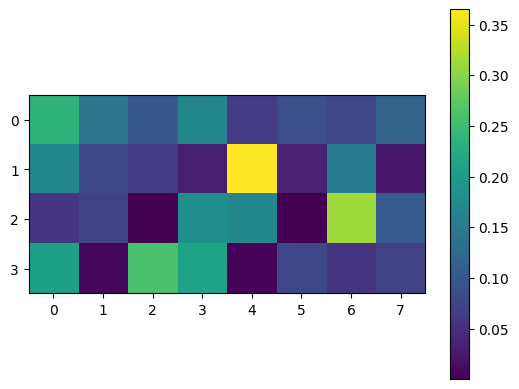

In [ ]:
plotDiff(input[1],autoencoder(input)[1])